**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data**

In [3]:
fdiry = file.path(FD_RES, "results", "A001_K562_WSTARRseq", "coverage", "track_normalized")
print(dir(fdiry))

 [1] "A001_K562_WSTARRseq.Input.mean.SUBSET.unstranded.bed.gz"  
 [2] "A001_K562_WSTARRseq.Input.rep1.SUBSET.unstranded.bed.gz"  
 [3] "A001_K562_WSTARRseq.Input.rep2.SUBSET.unstranded.bed.gz"  
 [4] "A001_K562_WSTARRseq.Input.rep3.SUBSET.unstranded.bed.gz"  
 [5] "A001_K562_WSTARRseq.Input.rep4.SUBSET.unstranded.bed.gz"  
 [6] "A001_K562_WSTARRseq.Output.mean.SUBSET.unstranded.bed.gz" 
 [7] "A001_K562_WSTARRseq.Output.rep1.SUBSET.unstranded.bed.gz" 
 [8] "A001_K562_WSTARRseq.Output.rep2.SUBSET.unstranded.bed.gz" 
 [9] "A001_K562_WSTARRseq.Output.rep3.SUBSET.unstranded.bed.gz" 
[10] "A001_K562_WSTARRseq.pLog2FC.mean.SUBSET.unstranded.bed.gz"


In [4]:
### set path
fdiry = file.path(FD_RES, "results", "A001_K562_WSTARRseq", "coverage", "track_normalized")
fname = "A001_K562_WSTARRseq.pLog2FC.mean.SUBSET.unstranded.bed.gz"
fpath = file.path(fdiry, fname)

### read data
cnames = c("Chrom", "Start", "End", "Input", "Output", "pLog2FC")
ctypes = cols(
    "Chrom"   = col_character(),
    "Start"   = col_integer(),
    "End"     = col_integer(),
    "Input"   = col_double(), 
    "Output"  = col_double(),
    "pLog2FC" = col_double()
)
dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)

### assign and show
dat_track_log2fc = dat
print(dim(dat))
head(dat)

[1] 49077000        6


Chrom,Start,End,Input,Output,pLog2FC
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chr11,4000000,4000001,0.153812,0.285322,0.155722
chr11,4000001,4000002,0.153812,0.283243,0.153386
chr11,4000002,4000003,0.153812,0.283243,0.153386
chr11,4000003,4000004,0.151309,0.287480,0.161275
chr11,4000004,4000005,0.151309,0.287480,0.161275
chr11,4000005,4000006,0.151309,0.287480,0.161275


## GATA1 region

In [5]:
### init
CHROM = "chrX"
START = 48780000
END   = 48810000

### filter
dat = dat_track_log2fc
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)

### assign and show
dat_track = dat
print(dim(dat))
head(dat)

[1] 30000     6


Chrom,Start,End,Input,Output,pLog2FC
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,0.188926,0.165134,-0.0291630
chrX,48780001,48780002,0.188926,0.165134,-0.0291630
chrX,48780002,48780003,0.186624,0.167212,-0.0237962
chrX,48780003,48780004,0.186624,0.167212,-0.0237962
chrX,48780004,48780005,0.186624,0.167212,-0.0237962
chrX,48780005,48780006,0.186624,0.166197,-0.0250514


In [6]:
dat = dat_track

###
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=pLog2FC))


###
lst = list(gp1, gp2, gp3)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, color="grey50") + 
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

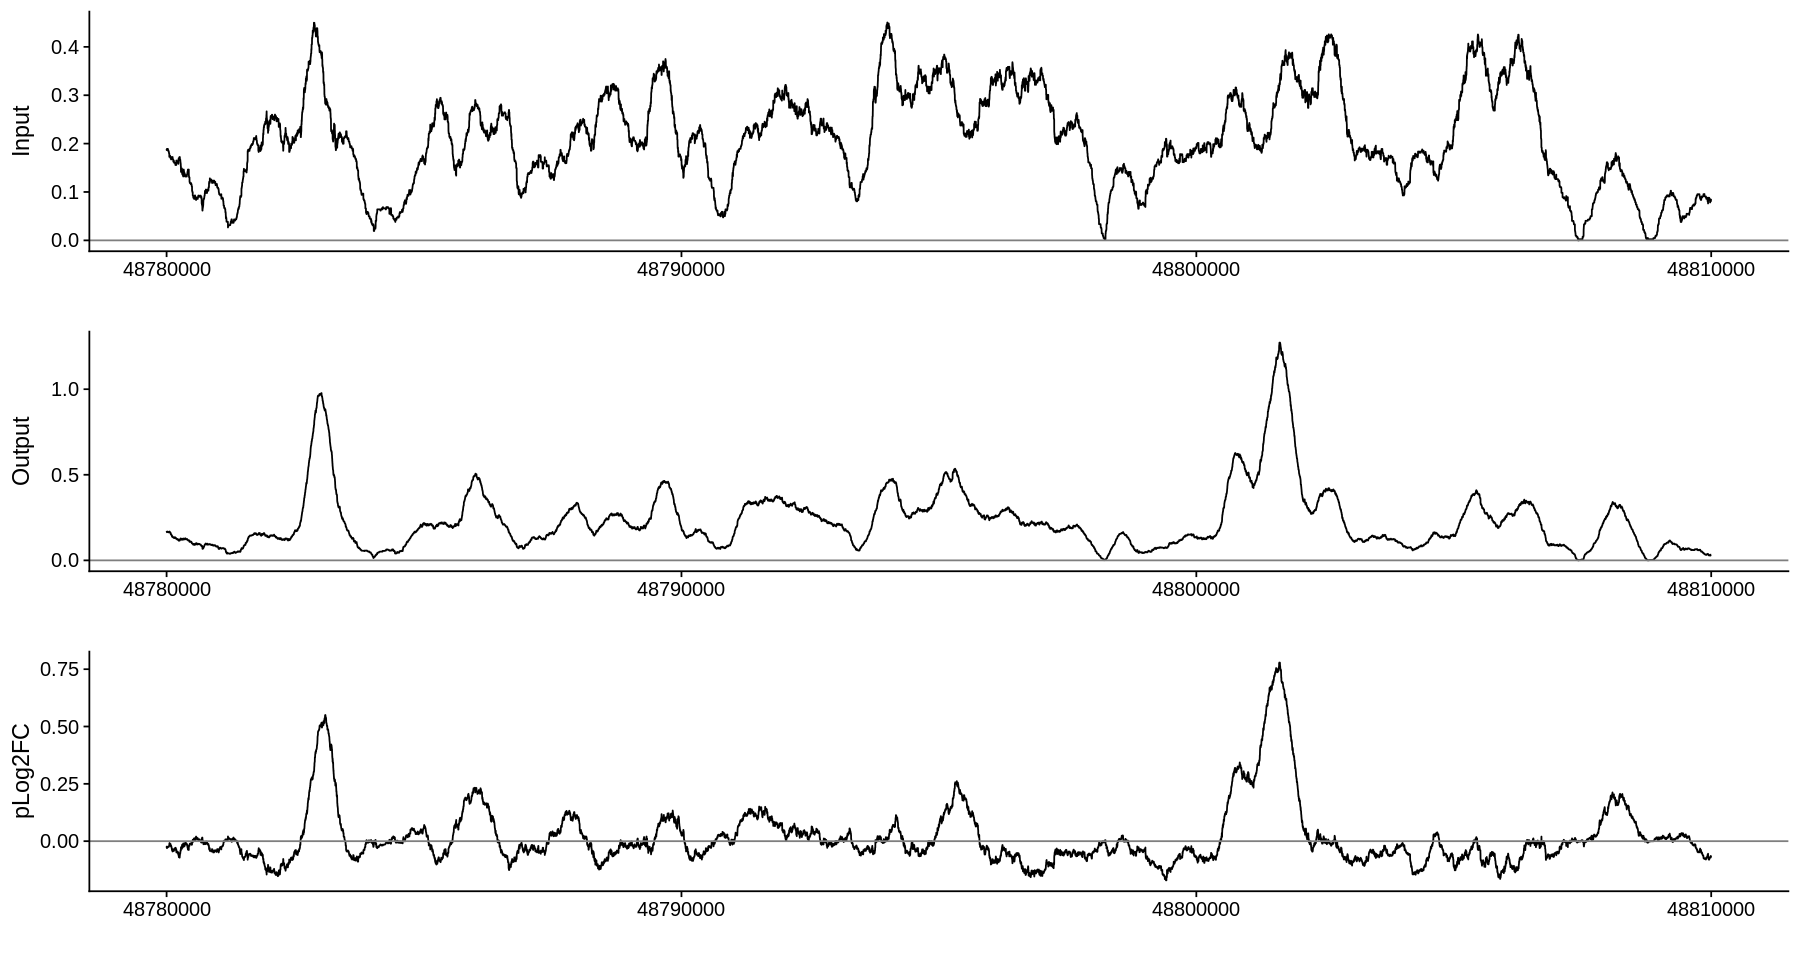

In [7]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)